# Install and Import Dependencies

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating word clouds
from wordcloud import WordCloud, STOPWORDS

# Load Data

In [2]:
FPATH_DATA = "/content/drive/MyDrive/Colab Notebooks/Rewire/data"
df_train = pd.read_csv(FPATH_DATA + "/train.csv")

# Class Imbalance

+ Figure below shows there is a large class imbalance in the dataset.
+ Will have to take this into account during modelling.

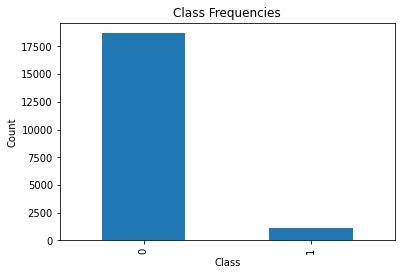

In [3]:
# Plot the frequency of each class
df_train['class'].value_counts().plot(kind='bar', xlabel='Class', ylabel='Count',
                                      title='Class Frequencies')
plt.show()

# Text Lengths

+ It looks as though the two classes follow a similar distribution for number of words
+ Hate speech appears to have more tweets with very few (0-5) words, relative to not hate speech

In [4]:
# Split tweets into words
df_train['word_count'] = df_train['tweet'].apply(lambda x: len(str(x).split()))

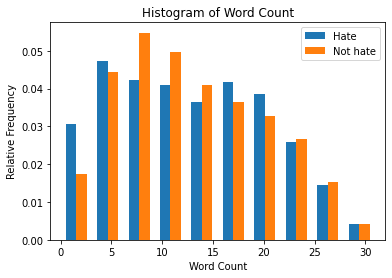

In [8]:
# Create histograms for word counts
fig, ax = plt.subplots()

# Slice df by classes
df_hate = df_train[df_train['class'] == 1]
df_no_hate = df_train[df_train['class'] == 0]

# Retrieve word counts
hate_word_count = df_hate['word_count']
no_hate_word_count = df_no_hate['word_count']

# Create histogram heights and bins
hate_heights, hate_bins = np.histogram(hate_word_count, density=True)
no_hate_heights, no_hate_bins = np.histogram(no_hate_word_count, bins=hate_bins, 
                                             density=True)
width = (hate_bins[1] - hate_bins[0])/3

# Plot graphs - ignore last bin (edge)
ax.bar(hate_bins[:-1], hate_heights, width=width, label='Hate')
ax.bar(no_hate_bins[:-1]+width, no_hate_heights, width=width, label='Not hate')

# Formatting
ax.set_xlabel('Word Count')
ax.set_ylabel('Relative Frequency')
ax.set_title('Histogram of Word Count')
ax.legend()

plt.show()

# Word Cloud

+ Visualisation below shows profanity in both hate speech and not hate speech. This is due to the nature of how the dataset was created - using a hate speech lexicon to search for tweets.

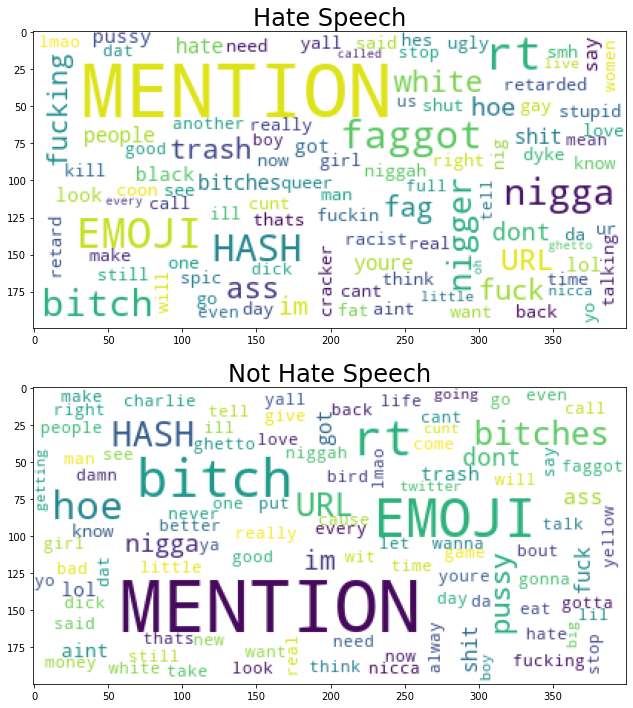

In [ ]:
# Combine all hate and non-hate tweets separately
all_hate_tweets = " ".join(tweet for tweet in df_hate['tweet'])
all_nohate_tweets = " ".join(tweet for tweet in df_no_hate['tweet'])

# Generate wordclouds
wc_hate = WordCloud(max_font_size=50, max_words=100, collocations=False,
                    stopwords=STOPWORDS, background_color="white").generate(all_hate_tweets)
wc_nohate = WordCloud(max_font_size=50, max_words=100, collocations=False,
                      stopwords=STOPWORDS, background_color="white").generate(all_nohate_tweets)

# Generate plot for wordclouds
fig, ax = plt.subplots(2, 1, figsize=(12,12))

# Plot wordclouds
ax[0].imshow(wc_hate)
ax[1].imshow(wc_nohate)

# Formatting
ax[0].set_title("Hate Speech", fontsize=24)
ax[1].set_title("Not Hate Speech", fontsize=24)

plt.show()

__Improvements:__

+ Change word cloud to bar chart - maybe frequency of word